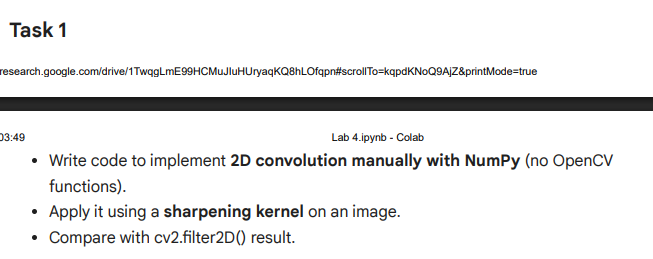

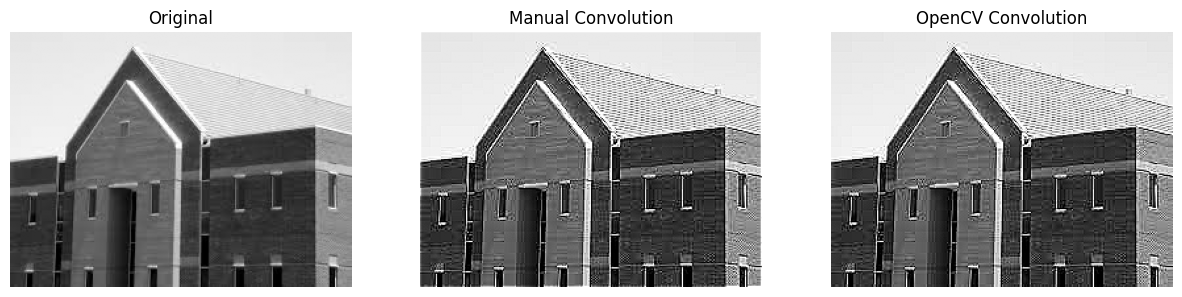

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("lab4.jpeg", cv2.IMREAD_GRAYSCALE)

#Define sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], )

#Manual convolution function
def manual_convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    # padding to handle borders
    padded_img = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+kh, j:j+kw]
            output[i,j] = np.sum(region * kernel)

    # clip values to valid pixel range
    return np.clip(output, 0, 255).astype(np.uint8)

#Apply manual convolution
manual_result = manual_convolution(img, kernel)

#Apply OpenCV convolution
opencv_result = cv2.filter2D(img, -1, kernel)


plt.figure(figsize=(15,6))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(manual_result, cmap='gray'), plt.title("Manual Convolution"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(opencv_result, cmap='gray'), plt.title("OpenCV Convolution"), plt.axis("off")
plt.show()


#Explanation:

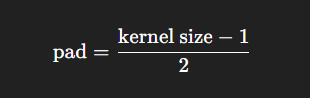

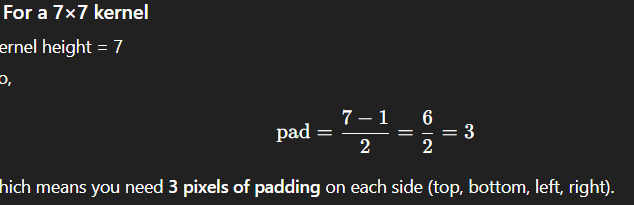

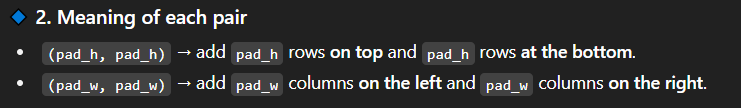

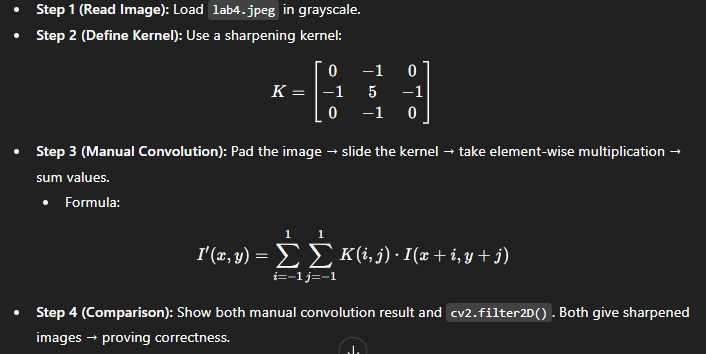

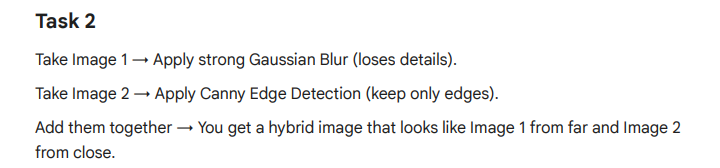

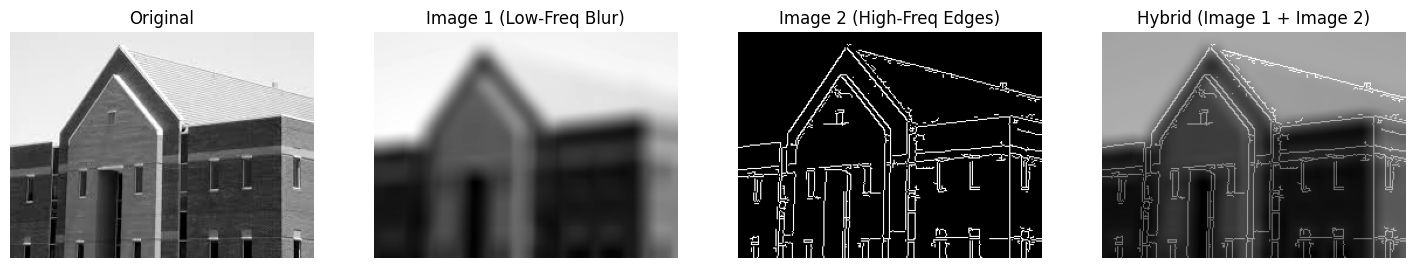

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a single grayscale image
img = cv2.imread("lab4.jpeg", cv2.IMREAD_GRAYSCALE)

# Step 1: Low-frequency (Image 1: blurred)
low_freq = cv2.GaussianBlur(img, (21,21), sigmaX=10)

# Step 2: High-frequency (Image 2: edges)
high_freq = cv2.Canny(img, 50, 150)

# Combine them into a hybrid image
#70% low freq values showing blurness
#30% high freq values showing edges/sharpness

#Gamma value set to 0 as no increase/decrease in brightness required
hybrid = cv2.addWeighted(low_freq, 0.7, high_freq, 0.3, 0)

# Show results
plt.figure(figsize=(18,8))

plt.subplot(1,4,1), plt.imshow(img, cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,2), plt.imshow(low_freq, cmap="gray"), plt.title("Image 1 (Low-Freq Blur)"), plt.axis("off")
plt.subplot(1,4,3), plt.imshow(high_freq, cmap="gray"), plt.title("Image 2 (High-Freq Edges)"), plt.axis("off")
plt.subplot(1,4,4), plt.imshow(hybrid, cmap="gray"), plt.title("Hybrid (Image 1 + Image 2)"), plt.axis("off")

plt.show()


#Explanation:

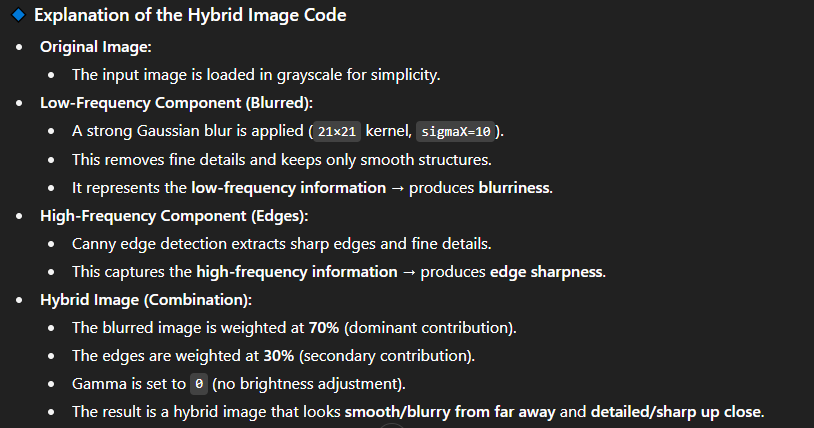

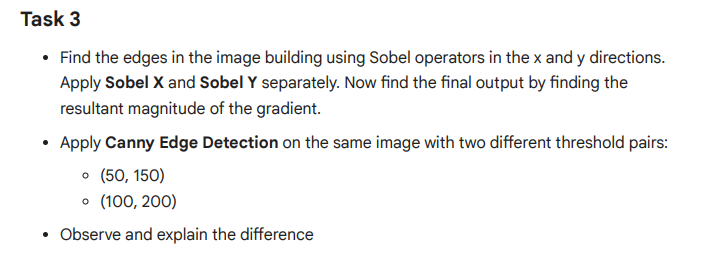

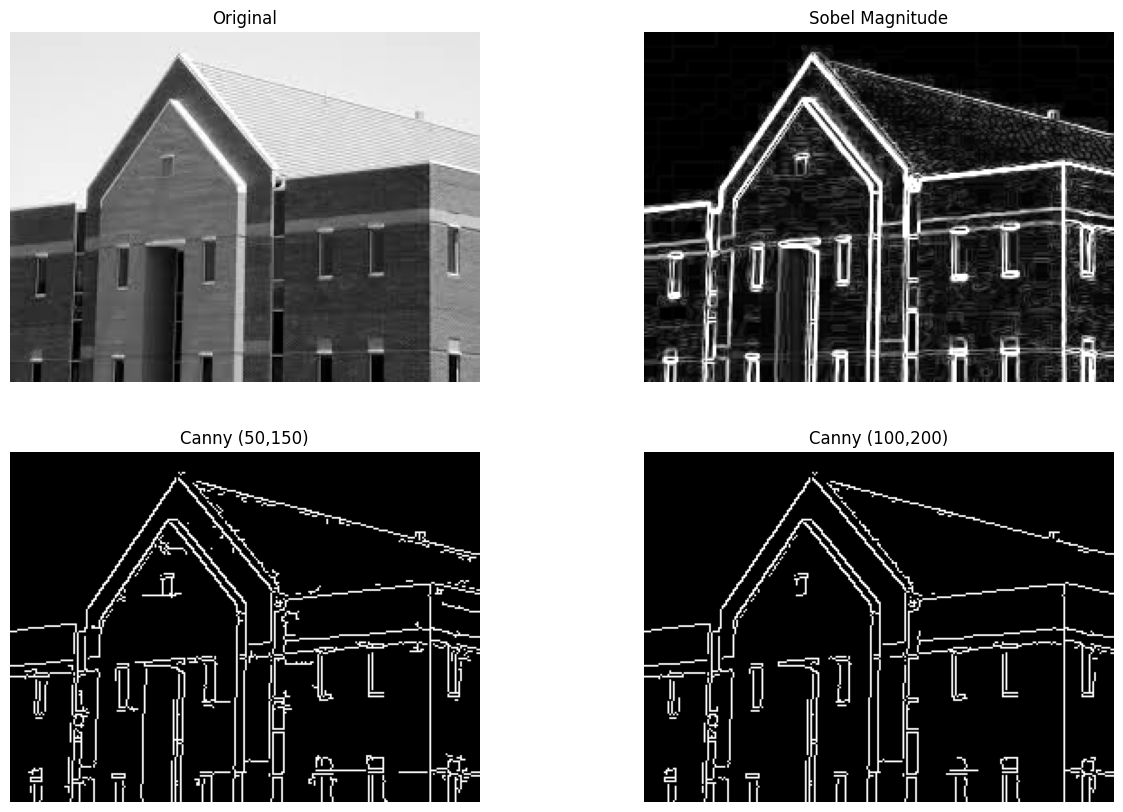

In [ ]:

#Read grayscale image
img = cv2.imread("lab4.jpeg", cv2.IMREAD_GRAYSCALE)

#Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.magnitude(sobelx, sobely)
sobel_mag = cv2.convertScaleAbs(sobel_mag)

#Canny Edge Detection with two thresholds
canny1 = cv2.Canny(img, 50, 150)
canny2 = cv2.Canny(img, 100, 200)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1), plt.imshow(img, cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(2,2,2), plt.imshow(sobel_mag, cmap="gray"), plt.title("Sobel Magnitude"), plt.axis("off")
plt.subplot(2,2,3), plt.imshow(canny1, cmap="gray"), plt.title("Canny (50,150)"), plt.axis("off")
plt.subplot(2,2,4), plt.imshow(canny2, cmap="gray"), plt.title("Canny (100,200)"), plt.axis("off")
plt.show()


#Explanation:

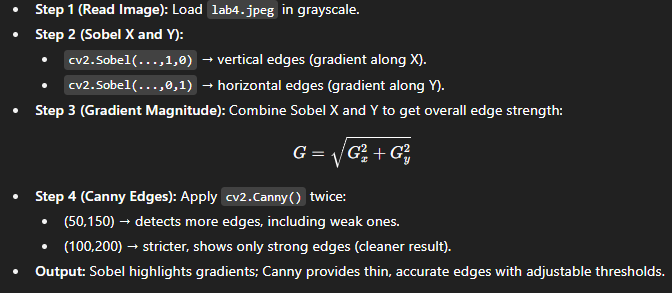

1.Canny (50,150): Lower thresholds detect both strong and weak edges → more lines appear, including small/noisy edges.

2.Canny (100,200): Higher thresholds detect only strong edges → fewer but cleaner and more prominent outlines of the building.

#Conclusion

1.Understood how manual convolution works and how kernels like sharpening enhance image details.

2.Learned to create hybrid images by combining Gaussian blur (low-frequency info) with Canny edges (high-frequency info).

3.Compared Sobel and Canny edge detection, observing the effect of different thresholds on edge clarity.

Overall, gained practical insight into how filtering and edge detection form the basis of computer vision tasks.